# PROJECT NAME:COVID-19 ANALYSIS 

>CODERS CAVE INTERSHIP PROGRAM (GOLDEN TASK-1)

                  --KOKKU NARESH-- 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
rama = pd.read_csv("C://Users//N-A-N-I//Desktop//CIP//PR-4//DATA//Covid Data.csv")

In [3]:
rama.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [4]:
rama.columns = [col.lower() for col in rama.columns]

In [5]:
rama.head()

,usmer,medical_unit,sex,patient_type,date_died,intubed,pneumonia,age,pregnant,diabetes,...,asthma,inmsupr,hipertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,clasiffication_final,icu
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [6]:
rama.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   usmer                 1048575 non-null  int64 
 1   medical_unit          1048575 non-null  int64 
 2   sex                   1048575 non-null  int64 
 3   patient_type          1048575 non-null  int64 
 4   date_died             1048575 non-null  object
 5   intubed               1048575 non-null  int64 
 6   pneumonia             1048575 non-null  int64 
 7   age                   1048575 non-null  int64 
 8   pregnant              1048575 non-null  int64 
 9   diabetes              1048575 non-null  int64 
 10  copd                  1048575 non-null  int64 
 11  asthma                1048575 non-null  int64 
 12  inmsupr               1048575 non-null  int64 
 13  hipertension          1048575 non-null  int64 
 14  other_disease         1048575 non-null  int64 
 15

In [7]:
for col in rama.columns:
    print(col)
    print(rama.loc[rama[col] == 97, col].count())
    print(rama.loc[rama[col] == 98, col].count())
    print(rama.loc[rama[col] == 99, col].count())
    print()

usmer
0
0
0

medical_unit
0
0
0

sex
0
0
0

patient_type
0
0
0

date_died
0
0
0

intubed
848544
0
7325

pneumonia
0
0
16003

age
135
124
86

pregnant
523511
3754
0

diabetes
0
3338
0

copd
0
3003
0

asthma
0
2979
0

inmsupr
0
3404
0

hipertension
0
3104
0

other_disease
0
5045
0

cardiovascular
0
3076
0

obesity
0
3032
0

renal_chronic
0
3006
0

tobacco
0
3220
0

clasiffication_final
0
0
0

icu
848544
0
7488



In [8]:
rama.groupby(['pregnant', 'sex'])['sex'].count()

pregnant  sex
1         1        8131
2         1      513179
97        2      523511
98        1        3754
Name: sex, dtype: int64

In [9]:
rama.pregnant = rama.pregnant.replace(97, 2)

In [10]:
rama.pregnant.value_counts()

2     1036690
1        8131
98       3754
Name: pregnant, dtype: int64

In [11]:
rama.groupby(['intubed', 'patient_type'])['patient_type'].count()

intubed  patient_type
1        2                33656
2        2               159050
97       1               848544
99       2                 7325
Name: patient_type, dtype: int64

In [12]:
rama.groupby(['icu', 'patient_type'])['patient_type'].count()

icu  patient_type
1    2                16858
2    2               175685
97   1               848544
99   2                 7488
Name: patient_type, dtype: int64

- Both columns have relation with 'patient_type' column
- The values 97 are of patients return to home
- Let's drop these columns, because are so many missing values

In [13]:
rama.drop(['intubed', 'icu'], axis=1, inplace=True)

In [14]:
rama.head(2)

,usmer,medical_unit,sex,patient_type,date_died,pneumonia,age,pregnant,diabetes,copd,asthma,inmsupr,hipertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,clasiffication_final
0,2,1,1,1,03/05/2020,1,65,2,2,2,2,2,1,2,2,2,2,2,3
1,2,1,2,1,03/06/2020,1,72,2,2,2,2,2,1,2,2,1,1,2,5


In [15]:
rama.drop(rama.index[rama.pneumonia == 99], axis=0, inplace=True)
rama.drop(rama.index[rama.pregnant == 98], axis=0, inplace=True)
rama.drop(rama.index[rama.copd == 98], axis=0, inplace=True)
rama.drop(rama.index[rama.diabetes == 98], axis=0, inplace=True)
rama.drop(rama.index[rama.asthma == 98], axis=0, inplace=True)
rama.drop(rama.index[rama.inmsupr == 98], axis=0, inplace=True)
rama.drop(rama.index[rama.other_disease == 98], axis=0, inplace=True)
rama.drop(rama.index[rama.cardiovascular == 98], axis=0, inplace=True)
rama.drop(rama.index[rama.obesity == 98], axis=0, inplace=True)
rama.drop(rama.index[rama.renal_chronic == 98], axis=0, inplace=True)
rama.drop(rama.index[rama.tobacco == 98], axis=0, inplace=True)

- **See the missing values again**

In [16]:
for col in rama.columns:
    print(col)
    print(rama.loc[rama[col] == 97, col].count())
    print(rama.loc[rama[col] == 98, col].count())
    print(rama.loc[rama[col] == 99, col].count())
    print()

usmer
0
0
0

medical_unit
0
0
0

sex
0
0
0

patient_type
0
0
0

date_died
0
0
0

pneumonia
0
0
0

age
128
115
79

pregnant
0
0
0

diabetes
0
0
0

copd
0
0
0

asthma
0
0
0

inmsupr
0
0
0

hipertension
0
178
0

other_disease
0
0
0

cardiovascular
0
0
0

obesity
0
0
0

renal_chronic
0
0
0

tobacco
0
0
0

clasiffication_final
0
0
0



In [17]:
def died_column(row):
    if row == '9999-99-99':
        return 2
    else:
        return 1

In [18]:
rama['died'] = rama.date_died.apply(died_column)

In [19]:
rama.drop('date_died', axis=1, inplace=True)

In [20]:
rama.head(2)

,usmer,medical_unit,sex,patient_type,pneumonia,age,pregnant,diabetes,copd,asthma,inmsupr,hipertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,clasiffication_final,died
0,2,1,1,1,1,65,2,2,2,2,2,1,2,2,2,2,2,3,1
1,2,1,2,1,1,72,2,2,2,2,2,1,2,2,1,1,2,5,1


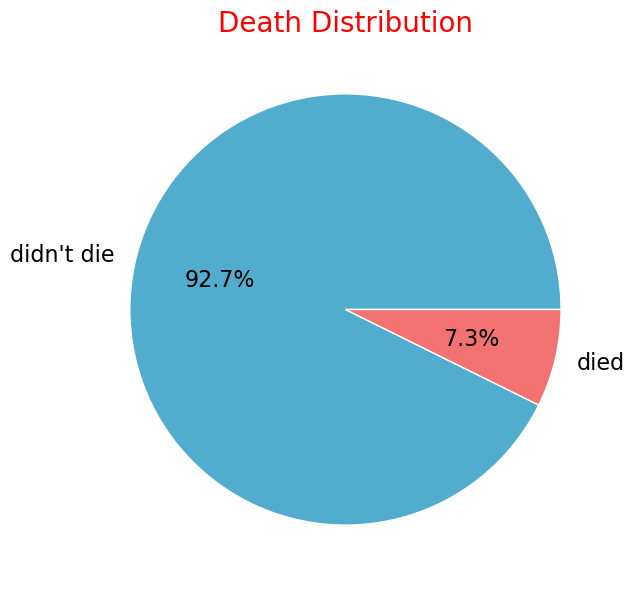

In [21]:
fig, ca = plt.subplots(figsize=(7, 7))
ca.pie(
    rama.died.value_counts().values, labels=['didn\'t die', 'died'], autopct='%1.1f%%',
    startangle=0, textprops={'fontsize': 16}, wedgeprops={'edgecolor': '#fff'}, colors=['#51ACCE', '#F27272']
)
ca.set_title('Death Distribution', fontsize=20, color='red')
plt.show()

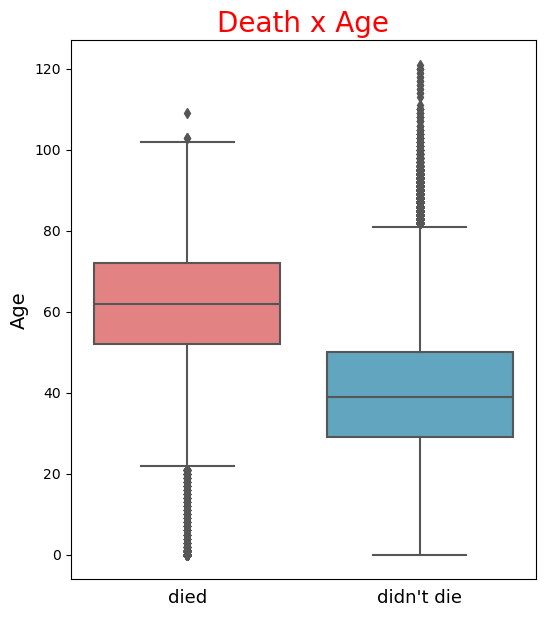

In [22]:
plt.figure(figsize=(6, 7))
sns.boxplot(data=rama, x='died', y='age', palette=sns.color_palette(['#F27272', '#51ACCE']))
plt.title('Death x Age', color='red', fontsize=20)
plt.xlabel(None)
plt.ylabel('Age', fontsize=14)
plt.tick_params(bottom=False)
plt.xticks([0, 1], ['died', 'didn\'t die'], fontsize=13);

- **You can see that the death rate is more concentrated in older peolple**

([<matplotlib.axis.XTick at 0x209caea91c0>,
 [Text(0, 0, 'Women'), Text(1, 0, 'Men')])

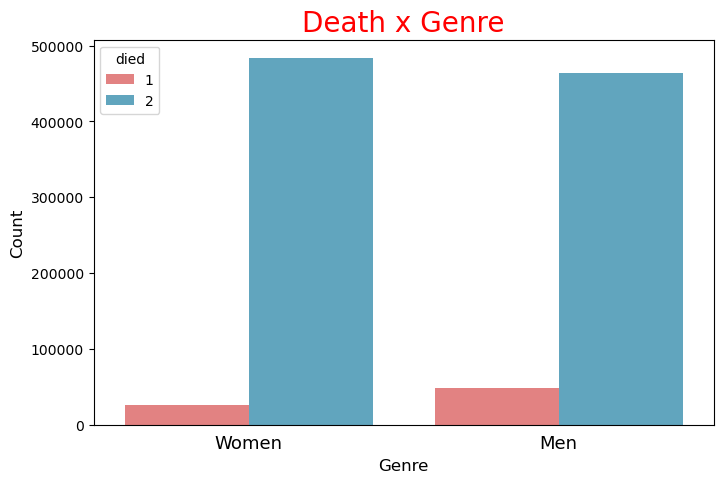

In [23]:
plt.figure(figsize=(8, 5))
sns.countplot(data=rama, x='sex', hue='died', palette=sns.color_palette(['#F27272', '#51ACCE']))
plt.title('Death x Genre', fontsize=20, color='r')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Genre', fontsize=12)
plt.tick_params(bottom=False)
plt.xticks([0, 1], ['Women', 'Men'], fontsize=13)

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(rama.drop('died', axis=1), rama.died, test_size=0.2, random_state=42)

In [26]:
# checking the shape

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(817724, 18)
(817724,)
(204431, 18)
(204431,)


In [27]:
rama_train = pd.concat([X_train, y_train], axis=1)
print(rama_train.shape)
rama_train.head()

(817724, 19)


,usmer,medical_unit,sex,patient_type,pneumonia,age,pregnant,diabetes,copd,asthma,inmsupr,hipertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,clasiffication_final,died
548464,2,12,2,1,2,44,2,2,2,2,2,1,2,2,2,2,1,3,2
420766,2,9,2,1,2,49,2,2,2,2,2,2,2,2,2,2,2,7,2
625218,2,12,2,1,2,56,2,1,2,2,2,2,2,2,2,2,2,3,2
425324,2,9,2,1,2,14,2,2,2,2,2,2,2,2,2,2,2,7,2
337334,2,5,1,1,2,20,2,2,2,2,2,2,2,2,2,2,2,6,2


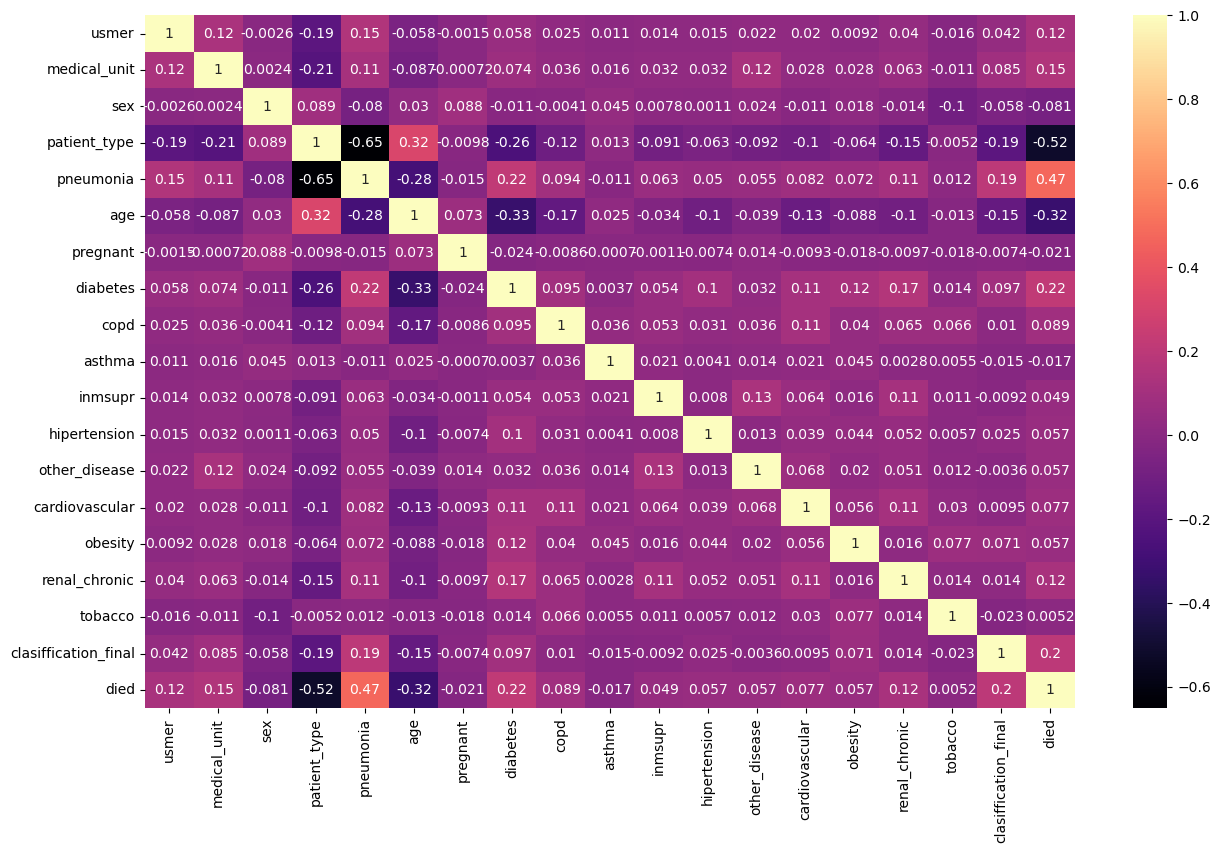

In [28]:
plt.figure(figsize=(15, 9))
sns.heatmap(rama_train.corr(), annot=True, cmap='magma');